<a href="https://colab.research.google.com/github/GibsonKingori/-AI-Coursework2025-/blob/main/Dataset_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---Group Members

Admission No
156792-Gibson Kingori
153845-Grace Wambugu
158430-Yeshua Kimani
167746-Desmond Turkmen
134779-Celestine Nyingi
166912- Steve Mochoge

In [2]:
# Cell 0: Setup + File Upload

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Allow file upload
from google.colab import files

print("Please upload your Employee dataset CSV file...")
uploaded = files.upload()

# Load the uploaded file
for fn in uploaded.keys():
    print("Loaded:", fn)
    df = pd.read_csv(fn)

print("\nDataset loaded successfully!")
print("Shape:", df.shape)
df.head()


Please upload your Employee dataset CSV file...


Saving EmployeeAttrition (1).csv to EmployeeAttrition (1).csv
Loaded: EmployeeAttrition (1).csv

Dataset loaded successfully!
Shape: (1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Question 2. cleaning the data

In [ ]:
# Cell 1: Data cleaning & checks

print(df.info())
print("\nMissing values per column:")
print(df.isnull().sum())

display(df.describe().T)

# Check duplicates
dups = df.duplicated().sum()
print(f"\nDuplicate rows: {dups}")

# Convert Attrition Yes/No → 1/0
if 'Attrition' in df.columns:
    df['AttritionFlag'] = df['Attrition'].map({'Yes':1,'No':0})

# Remove constant columns (common in this dataset)
for col in ['EmployeeCount','StandardHours','Over18']:
    if col in df.columns and df[col].nunique()==1:
        df.drop(columns=[col], inplace=True)

print("\nCleaned shape:", df.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0



Duplicate rows: 0

Cleaned shape: (1470, 33)


Question 2: Exploratory Data Analysis

Attrition rate: 16.1%


,AttritionFlag
JobRole,
Sales Representative,0.397590
Laboratory Technician,0.239382
Human Resources,0.230769
Sales Executive,0.174847
Research Scientist,0.160959
Manufacturing Director,0.068966
Healthcare Representative,0.068702
Manager,0.049020
Research Director,0.025000


/tmp/ipython-input-2643731010.py:23: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df.AttritionFlag==0]['YearsAtCompany'], label='Stayed', shade=True)
/tmp/ipython-input-2643731010.py:24: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df.AttritionFlag==1]['YearsAtCompany'], label='Left', shade=True)


Text(0.5, 1.0, 'Years at Company Distribution')

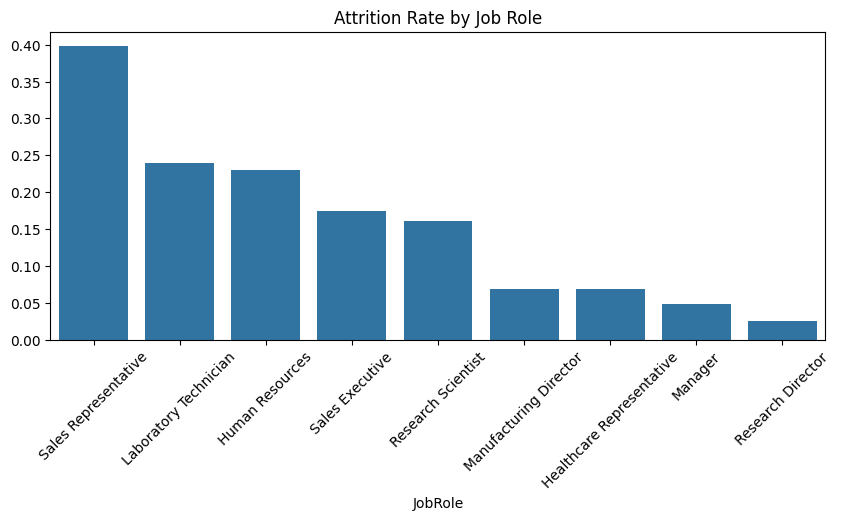

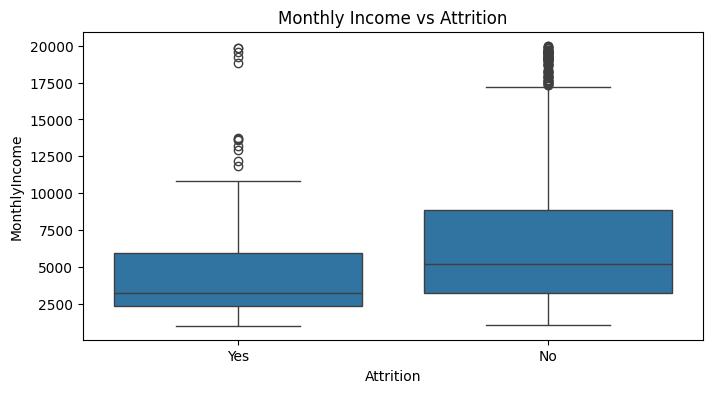

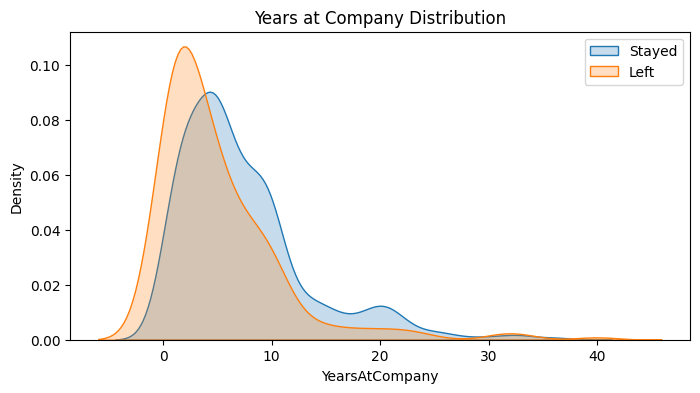

In [ ]:
# Cell 2: EDA (Insights & Plots)

# Insight 1: Attrition rate
attr_rate = df['AttritionFlag'].mean()
print(f"Attrition rate: {attr_rate*100:.1f}%")

# Insight 2: Attrition by JobRole
if 'JobRole' in df.columns:
    role_attr = df.groupby('JobRole')['AttritionFlag'].mean().sort_values(ascending=False)
    display(role_attr)
    plt.figure(figsize=(10,4))
    sns.barplot(x=role_attr.index, y=role_attr.values)
    plt.xticks(rotation=45)
    plt.title("Attrition Rate by Job Role")

# Insight 3: Income vs Attrition
plt.figure(figsize=(8,4))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title("Monthly Income vs Attrition")

# Insight 4: YearsAtCompany KDE
plt.figure(figsize=(8,4))
sns.kdeplot(df[df.AttritionFlag==0]['YearsAtCompany'], label='Stayed', shade=True)
sns.kdeplot(df[df.AttritionFlag==1]['YearsAtCompany'], label='Left', shade=True)
plt.legend()
plt.title("Years at Company Distribution")


Question 3: K-Nearest Neighbours algorithm

In [ ]:
# Cell 3: KNN Model

features = ['YearsAtCompany','MonthlyIncome']
X = df[features]
y = df['AttritionFlag']

# Handle missing + scaling
X = X.fillna(X.median())
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# CV to find best k
k_range = range(1,31,2)
cv_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train, y_train, cv=5).mean()
    cv_scores.append(score)

best_k = k_range[np.argmax(cv_scores)]
print("Best k =", best_k)

# Train final KNN
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

print("\nConfusion Matrix (KNN):")
print(confusion_matrix(y_test, y_pred_knn))


Best k = 19
KNN Accuracy: 0.8129251700680272
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       247
           1       0.30      0.13      0.18        47

    accuracy                           0.81       294
   macro avg       0.58      0.54      0.54       294
weighted avg       0.76      0.81      0.78       294


Confusion Matrix (KNN):
[[233  14]
 [ 41   6]]


Question 4: Eager learning classifier

In [ ]:
# Cell 4: Random Forest Model

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("RF Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

print("\nConfusion Matrix (RF):")
print(confusion_matrix(y_test, y_pred_rf))


RF Accuracy: 0.7551020408163265
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       247
           1       0.20      0.17      0.18        47

    accuracy                           0.76       294
   macro avg       0.52      0.52      0.52       294
weighted avg       0.74      0.76      0.75       294


Confusion Matrix (RF):
[[214  33]
 [ 39   8]]


Question 5: Hyperparameter Tuning

In [ ]:
# Cell 5: Hyperparameter tuning for Random Forest

param_grid = {
    'n_estimators':[50,100,200],
    'max_depth':[None,5,10,20],
    'min_samples_split':[2,5,10]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42),
                    param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
rf_tuned = grid.best_estimator_
y_pred_rf_tuned = rf_tuned.predict(X_test)

print("\nTuned RF Accuracy:", accuracy_score(y_test, y_pred_rf_tuned))
print(classification_report(y_test, y_pred_rf_tuned))

print("\nConfusion Matrix (RF Tuned):")
print(confusion_matrix(y_test, y_pred_rf_tuned))


Best Params: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 200}

Tuned RF Accuracy: 0.8061224489795918
              precision    recall  f1-score   support

           0       0.84      0.95      0.89       247
           1       0.19      0.06      0.10        47

    accuracy                           0.81       294
   macro avg       0.51      0.51      0.49       294
weighted avg       0.74      0.81      0.76       294


Confusion Matrix (RF Tuned):
[[234  13]
 [ 44   3]]


Question 6: Compare All Models with Confusion Matrices

In [ ]:
# Cell 6: Model Comparisons

models = {
    "KNN": y_pred_knn,
    "RF Baseline": y_pred_rf,
    "RF Tuned": y_pred_rf_tuned
}

for name, preds in models.items():
    cm = confusion_matrix(y_test, preds)
    tn, fp, fn, tp = cm.ravel()
    acc = accuracy_score(y_test, preds)
    prec = tp/(tp+fp) if tp+fp else 0
    rec = tp/(tp+fn) if tp+fn else 0
    f1 = 2*prec*rec/(prec+rec) if prec+rec else 0

    print(f"\n=== {name} ===")
    print(cm)
    print(f"Accuracy: {acc:.3f} | Precision: {prec:.3f} | Recall: {rec:.3f} | F1: {f1:.3f}")



=== KNN ===
[[233  14]
 [ 41   6]]
Accuracy: 0.813 | Precision: 0.300 | Recall: 0.128 | F1: 0.179

=== RF Baseline ===
[[214  33]
 [ 39   8]]
Accuracy: 0.755 | Precision: 0.195 | Recall: 0.170 | F1: 0.182

=== RF Tuned ===
[[234  13]
 [ 44   3]]
Accuracy: 0.806 | Precision: 0.188 | Recall: 0.064 | F1: 0.095


Group Photo

Saving Screenshot 2025-11-21 102330.png to Screenshot 2025-11-21 102330.png
Uploaded file: Screenshot 2025-11-21 102330.png


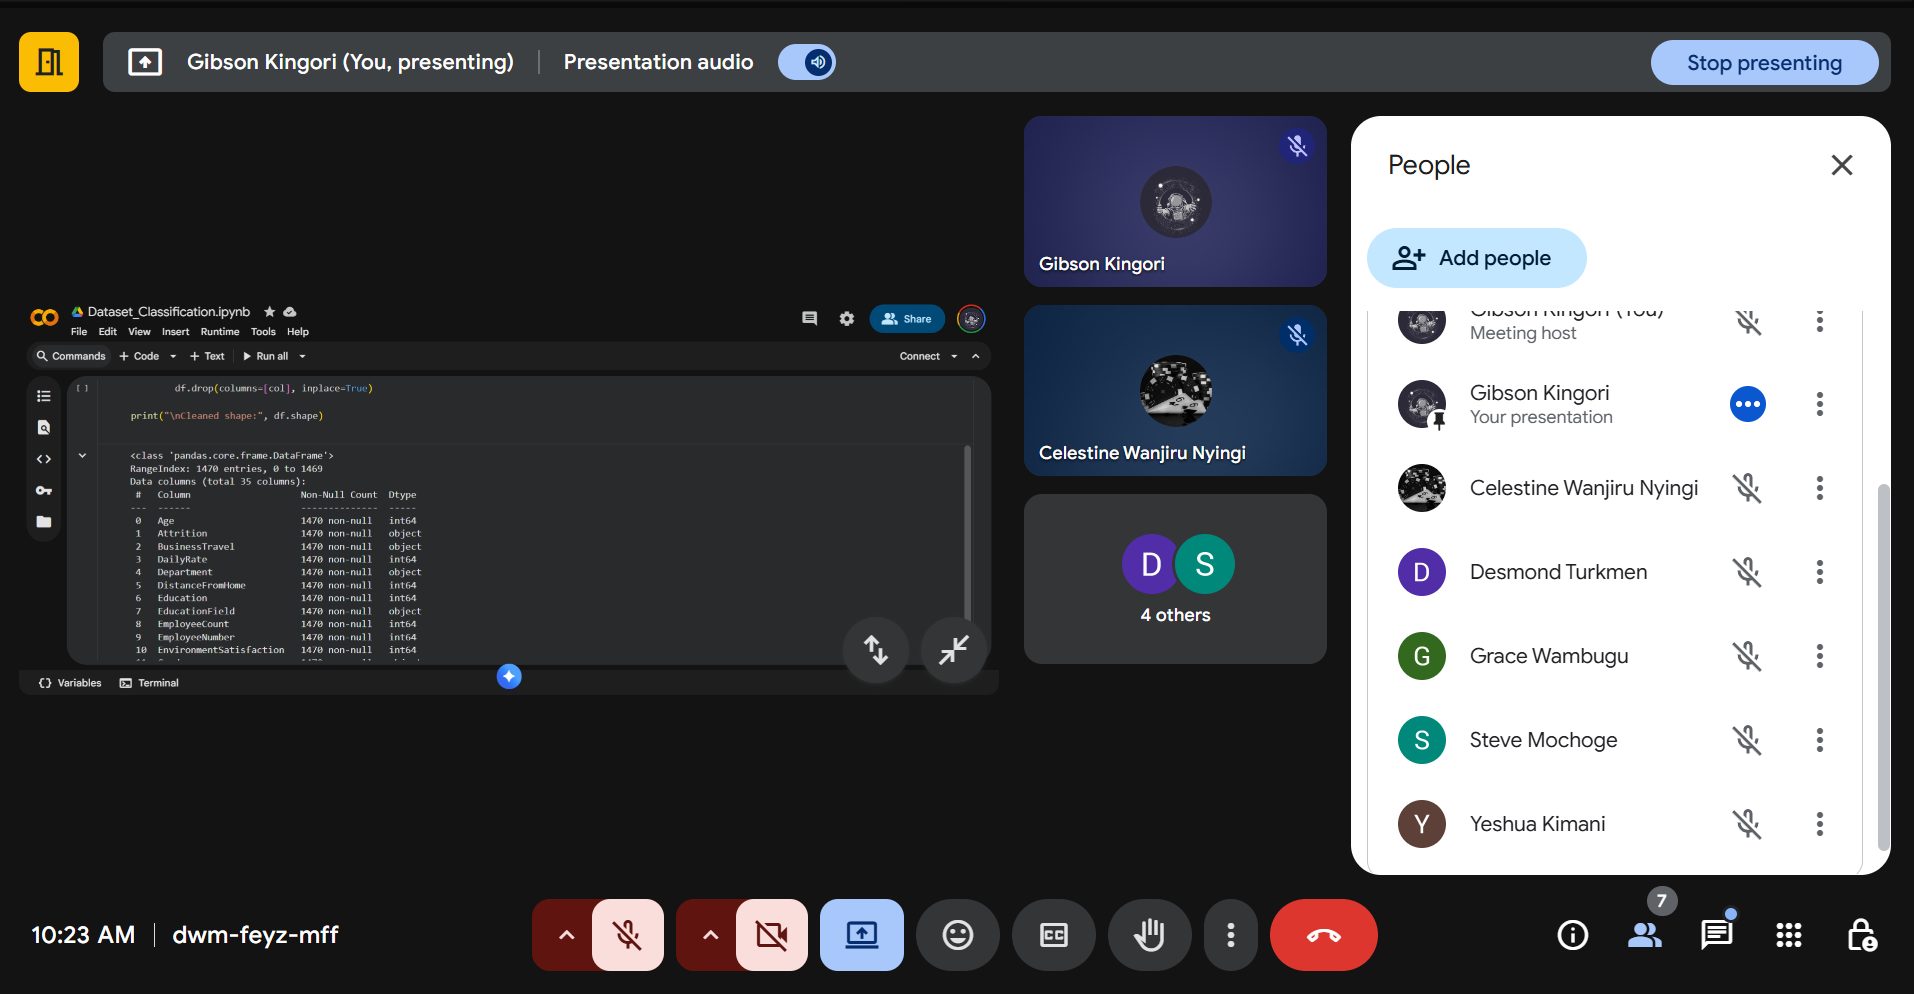

In [1]:
from google.colab import files
from IPython.display import Image

# Upload the image
uploaded = files.upload()

# Display the image
for filename in uploaded.keys():
    print("Uploaded file:", filename)
    display(Image(filename))
